# Model Training (model own data 1)

### 0. Imports

In [2]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import (
    Dense,
    Dropout,
    Flatten,
    Conv2D,
    BatchNormalization,
    Activation,
    MaxPooling2D
)
from keras.preprocessing.image import ImageDataGenerator

### 1. Paths

In [12]:
# DATASET_BASE_TRAIN_PATH = "/Users/adamdabkowski/DataspellProjects/Praca_dyplomowa/data/train_resized"
# DATASET_BASE_TRAIN_PATH = "/Users/adamd/DataspellProjects/Facial Expressions Recognition/data/train_resized"

DATASET_BASE_TRAIN_PATH = "../new_data"

# DATASET_BASE_TEST_PATH = "/Users/adamdabkowski/DataspellProjects/Praca_dyplomowa/data/test_resized"
DATASET_BASE_TEST_PATH = "/Users/adamd/DataspellProjects/Facial Expressions Recognition/data/test_resized"

### 2. Data preprocessing

In [20]:
batch_size  = 32
img_size = 128

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(
    DATASET_BASE_TRAIN_PATH,
    target_size = (img_size,img_size),
    color_mode = "grayscale",
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
)

test_set = datagen_val.flow_from_directory(
    DATASET_BASE_TEST_PATH,
    target_size=(img_size,img_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 1453 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


### 5. Model creating

In [27]:
CATEGORIES = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]

In [29]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint(
    filepath="./model_own_data_1.h5",
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    mode='min'
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=10,
    verbose=1,
    restore_best_weights=True,
)

reduce_learning_rate = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    verbose=1,
    min_delta=0.0001,
)

callbacks_list = [early_stopping, checkpoint, reduce_learning_rate]

In [31]:
from keras.optimizers import Adam

n_classes = len(CATEGORIES)

model = Sequential()

model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (img_size,img_size,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(n_classes, activation='softmax'))

In [32]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 128, 128, 64)      640       
                                                                 
 batch_normalization_18 (Bat  (None, 128, 128, 64)     256       
 chNormalization)                                                
                                                                 
 activation_18 (Activation)  (None, 128, 128, 64)      0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 64, 64, 64)       0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 64, 64, 64)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 64, 64, 128)      

### 6. Model training

In [33]:
epochs = 50

In [34]:
history = model.fit_generator(
    generator=train_set,
    steps_per_epoch=train_set.n//train_set.batch_size,
    epochs=epochs,
    validation_data = test_set,
    validation_steps = test_set.n//test_set.batch_size,
    callbacks=callbacks_list,
)

Epoch 1/50


C:\Users\adamd\AppData\Local\Temp\ipykernel_18144\2934536250.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


45/45 [==============================] - ETA: 0s - loss: 2.1392 - accuracy: 0.2231
Epoch 1: val_loss improved from inf to 22.55665, saving model to .\model_own_data_1.h5
45/45 [==============================] - 148s 3s/step - loss: 2.1392 - accuracy: 0.2231 - val_loss: 22.5566 - val_accuracy: 0.1396 - lr: 0.0010
Epoch 2/50
45/45 [==============================] - ETA: 0s - loss: 1.8881 - accuracy: 0.3075
Epoch 2: val_loss improved from 22.55665 to 12.16061, saving model to .\model_own_data_1.h5
45/45 [==============================] - 140s 3s/step - loss: 1.8881 - accuracy: 0.3075 - val_loss: 12.1606 - val_accuracy: 0.1413 - lr: 0.0010
Epoch 3/50
45/45 [==============================] - ETA: 0s - loss: 1.8766 - accuracy: 0.3272
Epoch 3: val_loss improved from 12.16061 to 2.54232, saving model to .\model_own_data_1.h5
45/45 [==============================] - 142s 3s/step - loss: 1.8766 - accuracy: 0.3272 - val_loss: 2.5423 - val_accuracy: 0.1341 - lr: 0.0010
Epoch 4/50
45/45 [==========

### 7. Results

**7.1 Loss**

NameError: name 'history' is not defined

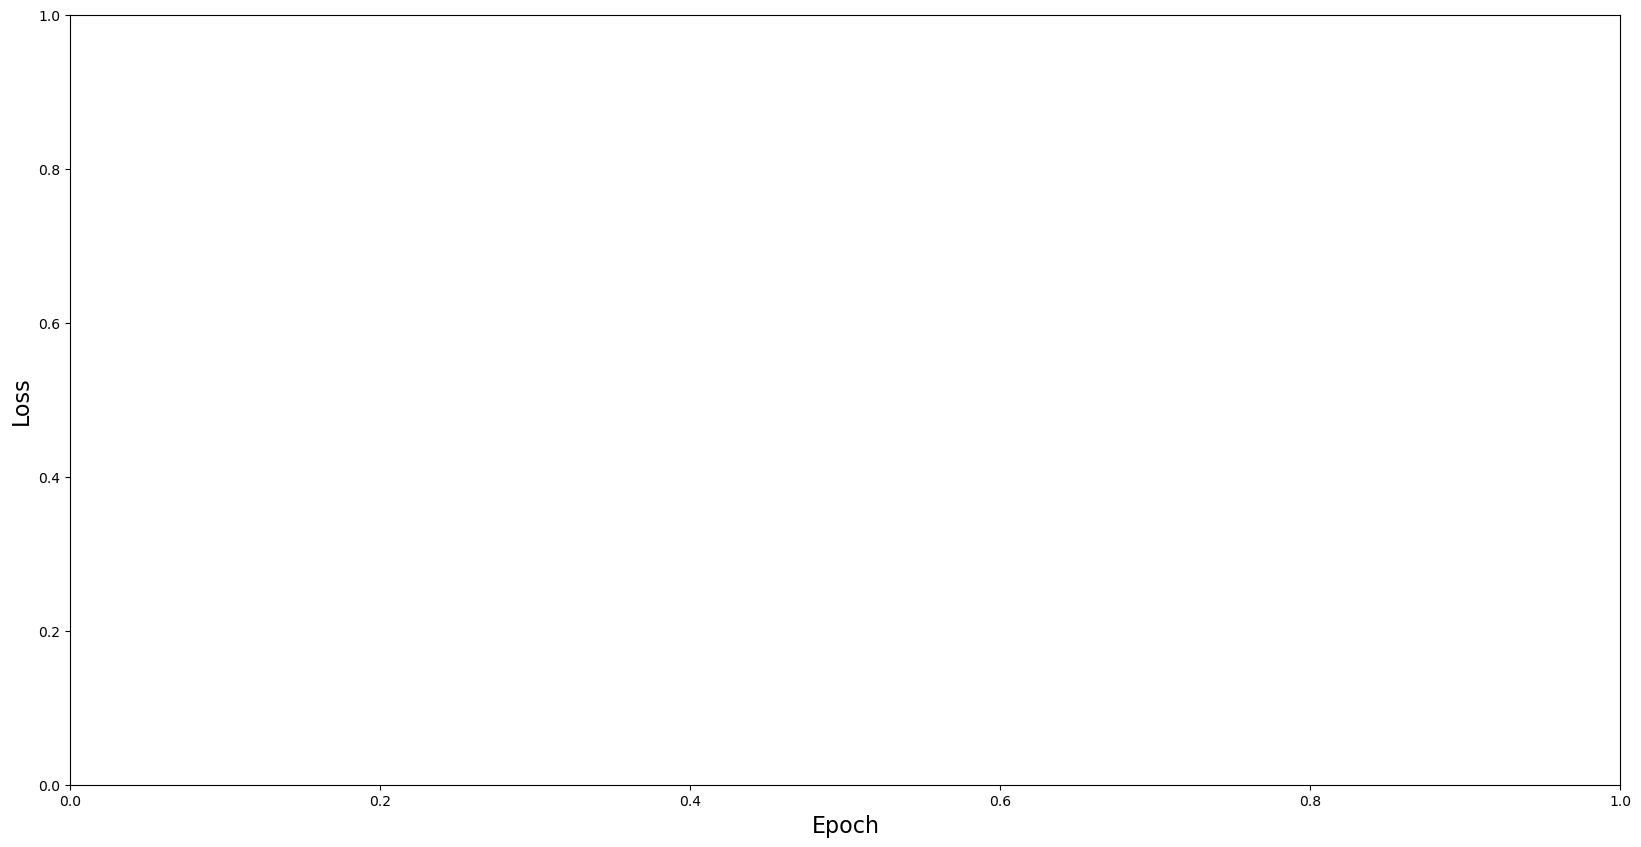

In [3]:
plt.figure(figsize=(20,10))
plt.ylabel('Loss', fontsize=16)
plt.xlabel('Epoch', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.show()

**7.2 Accuracy**

NameError: name 'history' is not defined

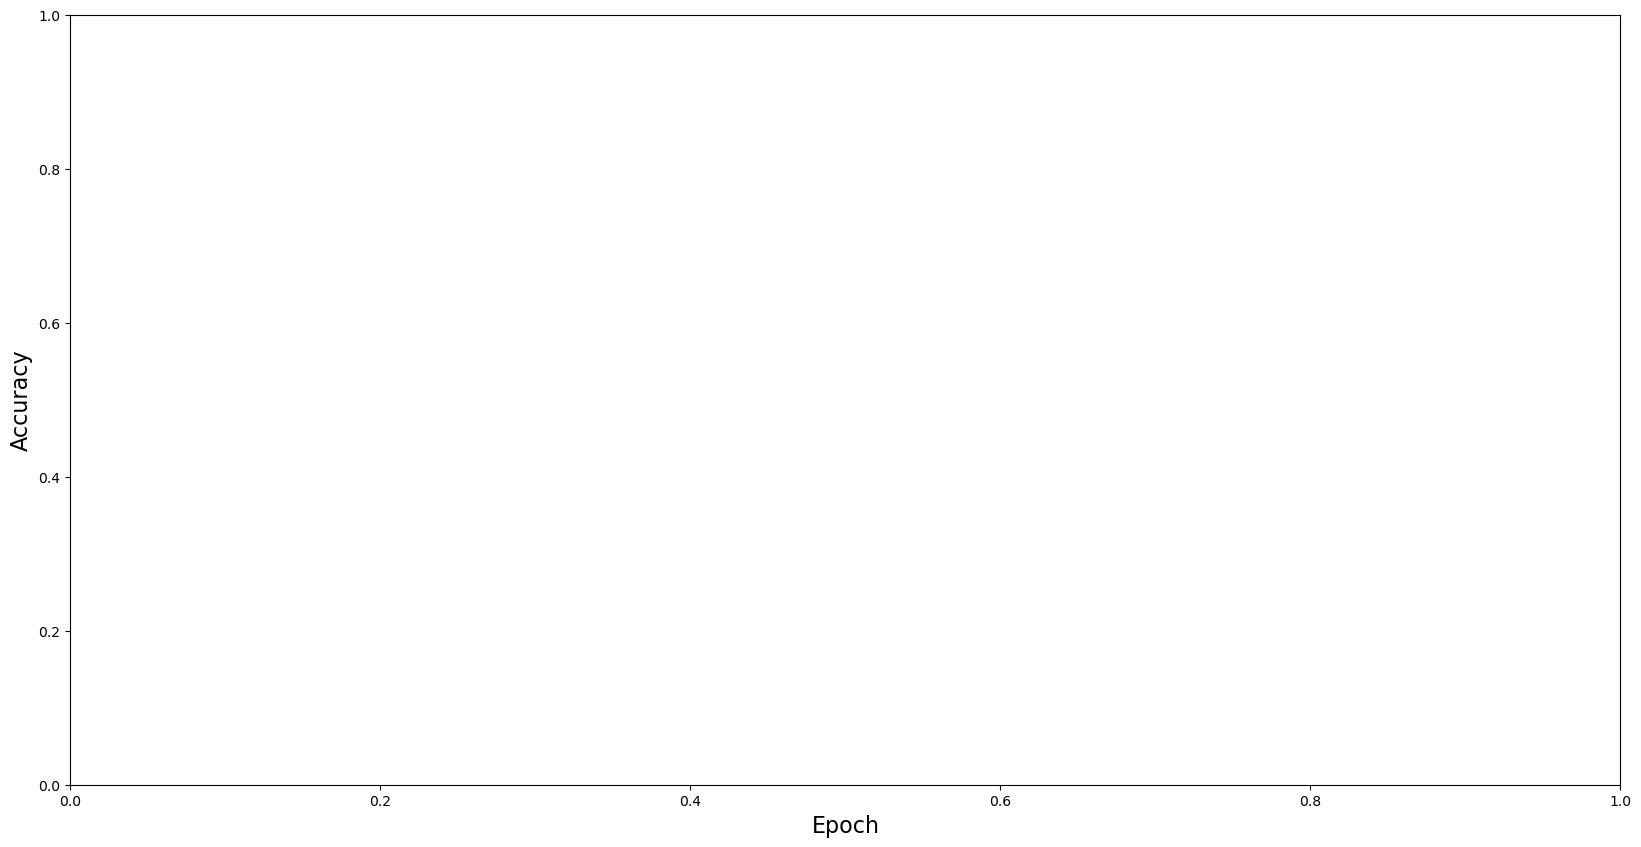

In [4]:
plt.figure(figsize=(20,10))
plt.ylabel('Accuracy', fontsize=16)
plt.xlabel('Epoch', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()